In [1]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


#classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# performance metrics
from sklearn.metrics import f1_score,precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

In [2]:
df=pd.read_csv('kag_risk_factors_cervical_cancer.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [4]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [5]:
df.tail()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0
857,29,2.0,20.0,1.0,0.0,0.0,0.0,1.0,0.5,0.0,...,?,?,0,0,0,0,0,0,0,0


In [6]:
df.sample(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
830,35,4.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
563,36,1.0,28.0,1.0,1.0,16.0,2.4,0.0,0.0,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
46,36,2.0,18.0,3.0,?,?,?,1.0,5.0,0.0,...,?,?,0,0,0,0,0,0,0,0
755,30,2.0,18.0,1.0,1.0,11.0,1.65,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
623,22,1.0,17.0,2.0,0.0,0.0,0.0,1.0,0.16,1.0,...,?,?,0,0,0,0,0,0,0,0
427,20,1.0,16.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,...,?,?,0,0,0,0,0,0,0,0
583,23,3.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
753,20,1.0,18.0,1.0,0.0,0.0,0.0,1.0,14.0,0.0,...,?,?,0,0,0,0,1,1,0,1
143,28,1.0,19.0,2.0,0.0,0.0,0.0,?,?,?,...,?,?,0,0,0,0,0,0,0,0
736,36,3.0,18.0,4.0,0.0,0.0,0.0,1.0,2.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [7]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Cleaning Data

In [8]:
# replace original dataframe's ? symbol with nulls
df = df.replace('?', np.nan)

In [9]:
df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [10]:
#Features' Data Types and Their Respective Null Counts
print('Number of Rows:', df.shape[0])
print('Number of Columns:', df.shape[1], '\n')
data_types = df.dtypes

data_types = pd.DataFrame(data_types)
data_types = data_types.assign(Null_Values = 
                               df.isnull().sum())
total_null = data_types['Null_Values'].sum()
data_types.reset_index(inplace = True)

data_types = data_types.rename(columns={0:'Data Type',
                          'index': 'Column/Variable',
                          'Null_Values': "# of Nulls"})
data_types

Number of Rows: 858
Number of Columns: 36 



,Column/Variable,Data Type,# of Nulls
0,Age,int64,0
1,Number of sexual partners,object,26
2,First sexual intercourse,object,7
3,Num of pregnancies,object,56
4,Smokes,object,13
5,Smokes (years),object,13
6,Smokes (packs/year),object,13
7,Hormonal Contraceptives,object,108
8,Hormonal Contraceptives (years),object,108
9,IUD,object,117


## Null value Vs Features

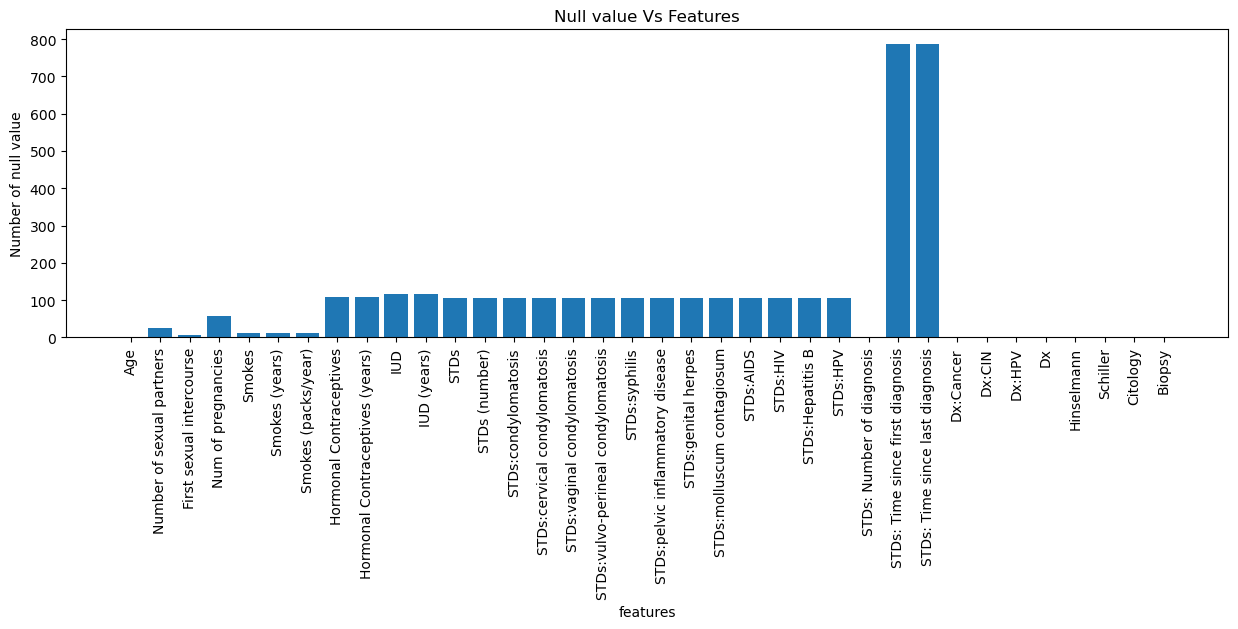

In [11]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=90)
plt.bar(df.columns,df.isnull().sum())
plt.xlabel("features")
plt.ylabel("Number of null value")
plt.title("Null value Vs Features")
plt.savefig("nullfeatures.png")



## Droping Useless Coulmns

In [12]:
#too many null values in  2 columns i.e."STDs: Time since first diagnosis" and "STDs: Time since last diagnosis"
#better to drop these 2 useless coulmns 

In [13]:
df=df.drop(columns=["STDs: Time since first diagnosis"])
df=df.drop(columns=["STDs: Time since last diagnosis"])

<BarContainer object of 34 artists>

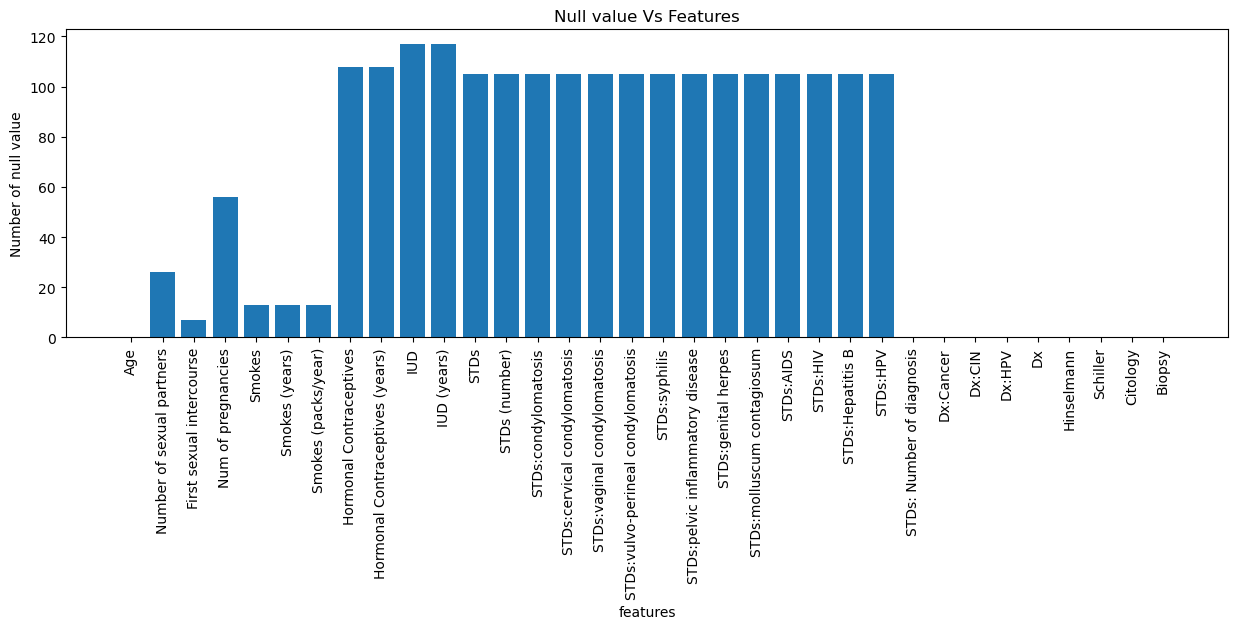

In [14]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=90)
plt.xlabel("features")
plt.ylabel("Number of null value")
plt.title("Null value Vs Features")
plt.bar(df.columns,df.isnull().sum())

In [15]:
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [16]:
df=df.apply(pd.to_numeric)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [18]:
round(df.mean(), 3)

Age                                   26.821
Number of sexual partners              2.528
First sexual intercourse              16.995
Num of pregnancies                     2.276
Smokes                                 0.146
Smokes (years)                         1.220
Smokes (packs/year)                    0.453
Hormonal Contraceptives                0.641
Hormonal Contraceptives (years)        2.256
IUD                                    0.112
IUD (years)                            0.515
STDs                                   0.105
STDs (number)                          0.177
STDs:condylomatosis                    0.058
STDs:cervical condylomatosis           0.000
STDs:vaginal condylomatosis            0.005
STDs:vulvo-perineal condylomatosis     0.057
STDs:syphilis                          0.024
STDs:pelvic inflammatory disease       0.001
STDs:genital herpes                    0.001
STDs:molluscum contagiosum             0.001
STDs:AIDS                              0.000
STDs:HIV  

In [19]:
#Imputing Missing Values by Median
df=df.fillna(round(df.mean(), 3))
df.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


### Duplicate

In [20]:
df.duplicated().sum()

23

In [21]:
df=df.drop_duplicates()
df.shape

(835, 34)

# Exploratory Data Analysis (EDA)

<Axes: xlabel='Age', ylabel='count'>

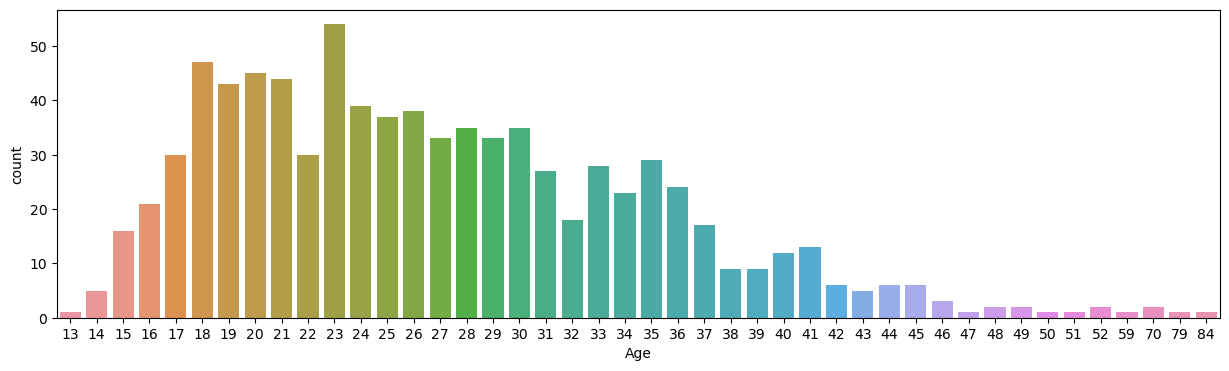

In [22]:
plt.figure(figsize=(15,4))
sns.countplot(x="Age", data=df)

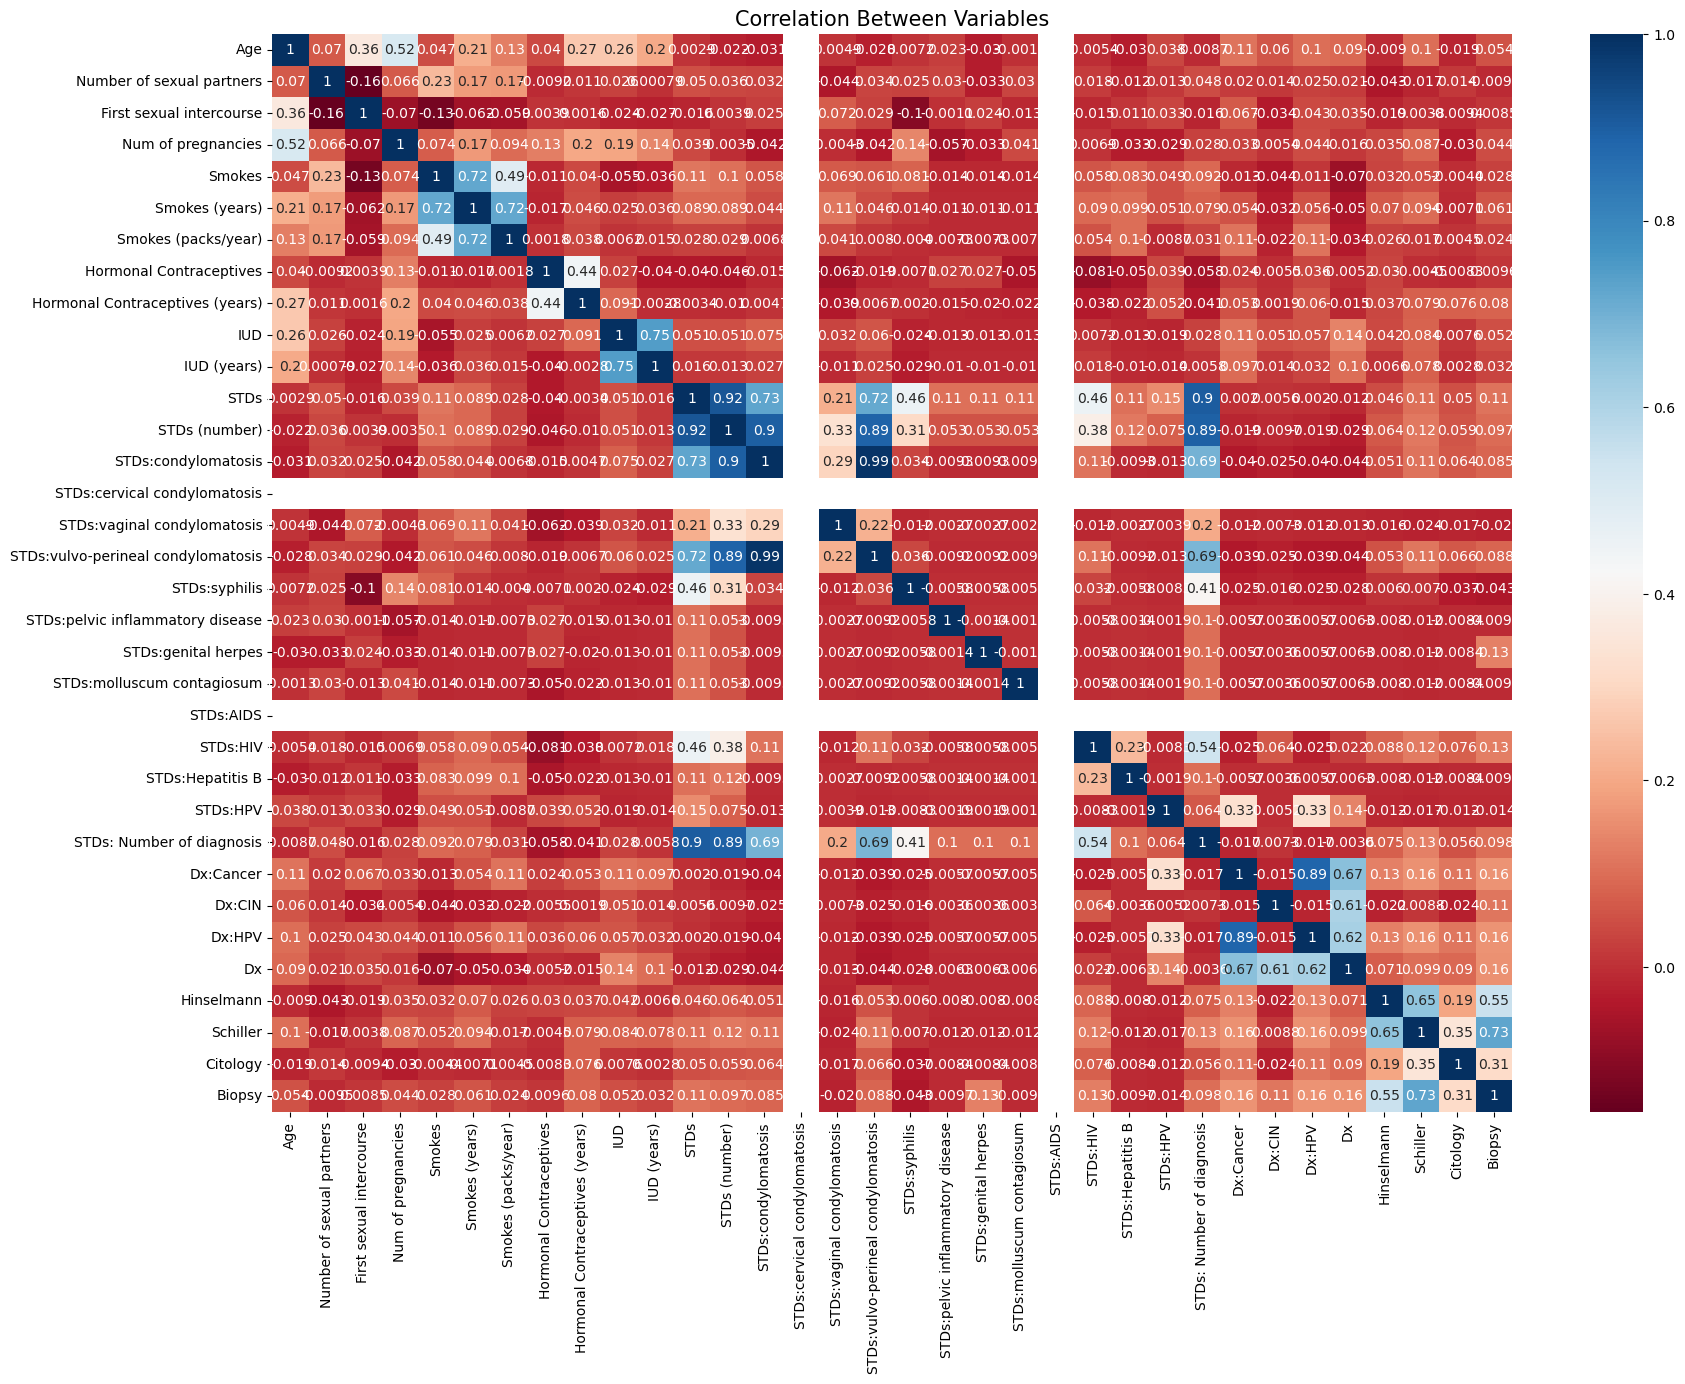

In [23]:
plt.figure(figsize=(20, 14))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.title("Correlation Between Variables", size=15)
plt.show()

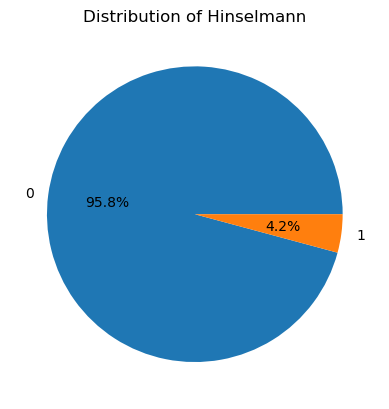

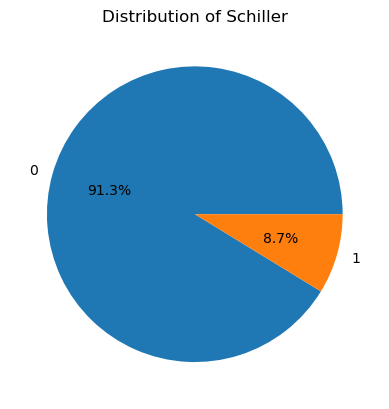

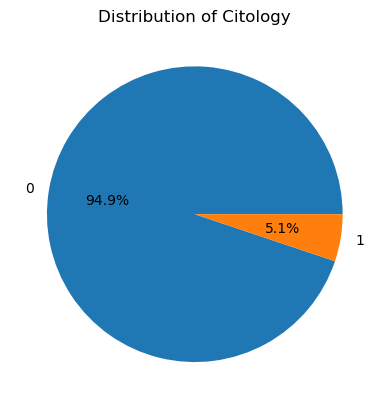

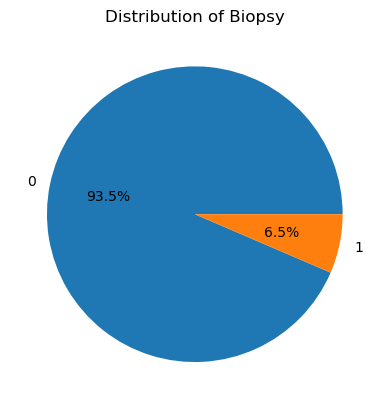

In [24]:
# Category Variables - Pie charts
category_visualisation_df = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']
for feature in category_visualisation_df:
    counts = df[feature].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
    plt.title(f"Distribution of {feature}")
    plt.show()

C:\Users\ragha\AppData\Local\Temp\ipykernel_29204\2193511434.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"]);


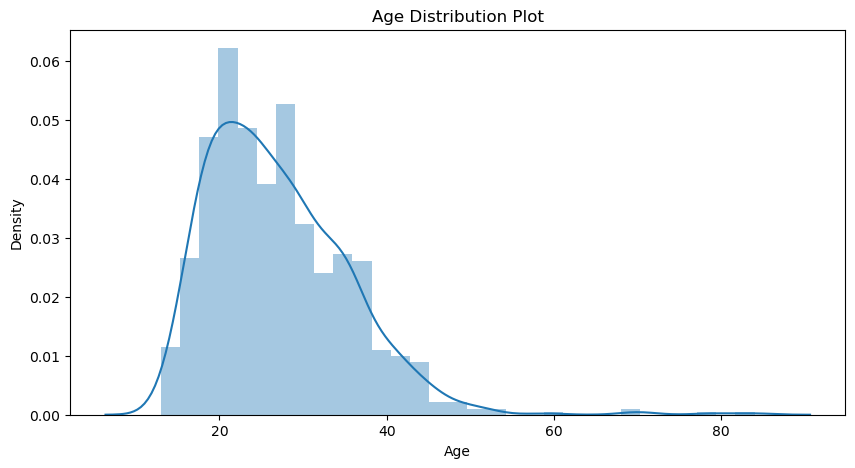

In [25]:
plt.figure(figsize=(10,5))
sns.distplot(df["Age"]);
plt.title("Age Distribution Plot");

C:\Users\ragha\AppData\Local\Temp\ipykernel_29204\3947476968.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Number of sexual partners"]);


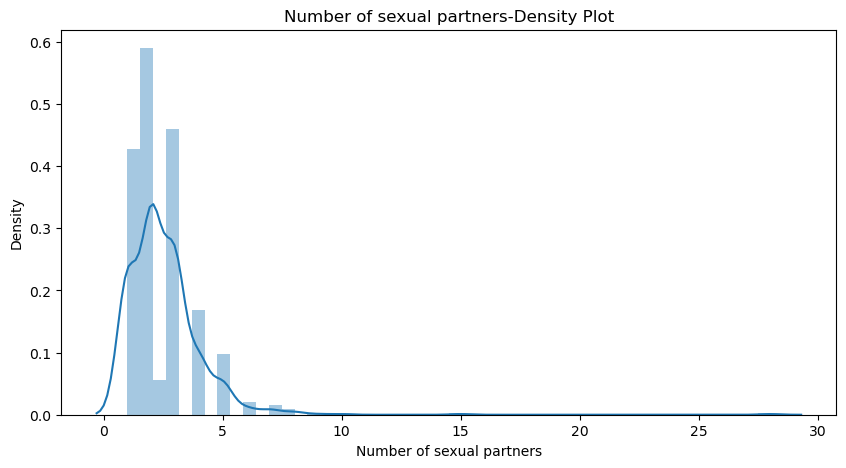

In [26]:
plt.figure(figsize=(10,5))
sns.distplot(df["Number of sexual partners"]);
plt.title("Number of sexual partners-Density Plot");

C:\Users\ragha\AppData\Local\Temp\ipykernel_29204\728247564.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["First sexual intercourse"]);


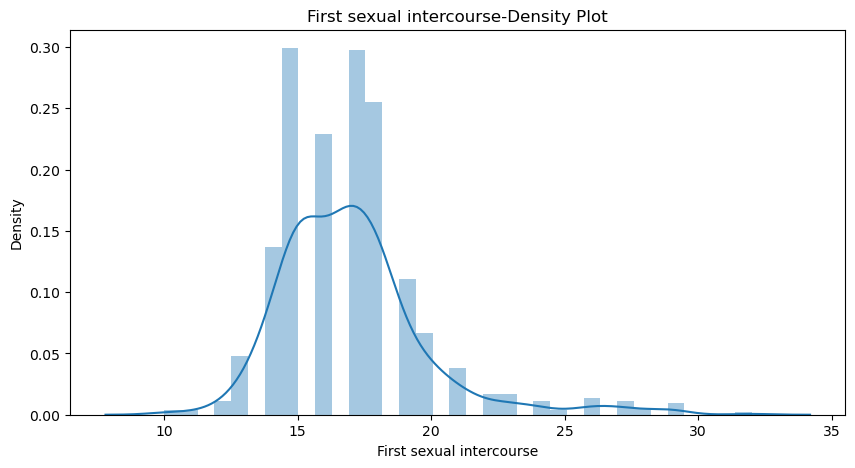

In [27]:
plt.figure(figsize=(10,5))
sns.distplot(df["First sexual intercourse"]);
plt.title("First sexual intercourse-Density Plot");

C:\Users\ragha\AppData\Local\Temp\ipykernel_29204\3506421043.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Num of pregnancies"]);


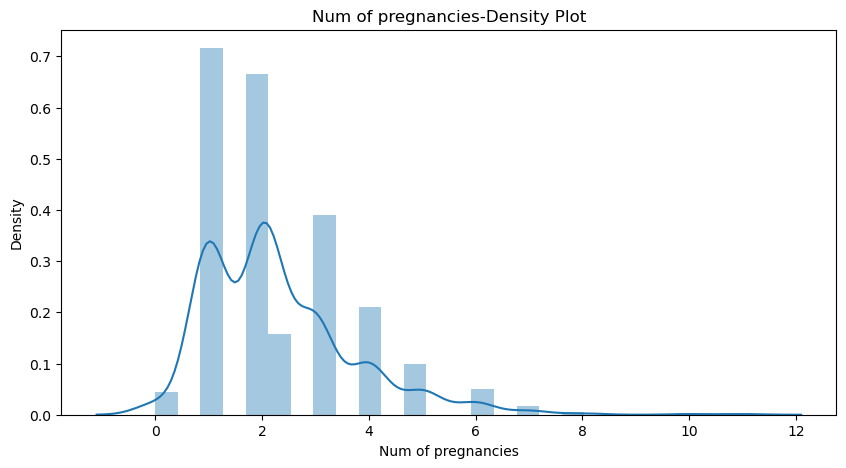

In [28]:
plt.figure(figsize=(10,5))
sns.distplot(df["Num of pregnancies"]);
plt.title("Num of pregnancies-Density Plot");

C:\Users\ragha\AppData\Local\Temp\ipykernel_29204\3199684567.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Smokes (years)"]);


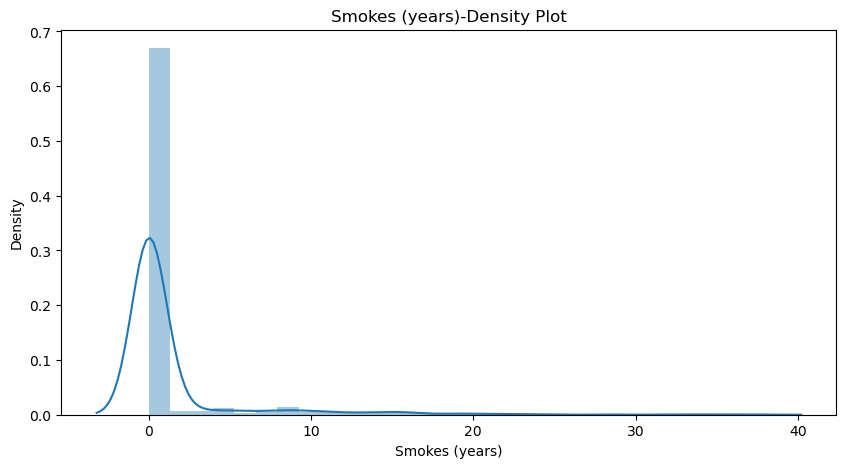

In [29]:
plt.figure(figsize=(10,5))
sns.distplot(df["Smokes (years)"]);
plt.title("Smokes (years)-Density Plot");

C:\Users\ragha\AppData\Local\Temp\ipykernel_29204\510509676.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Hormonal Contraceptives (years)"]);


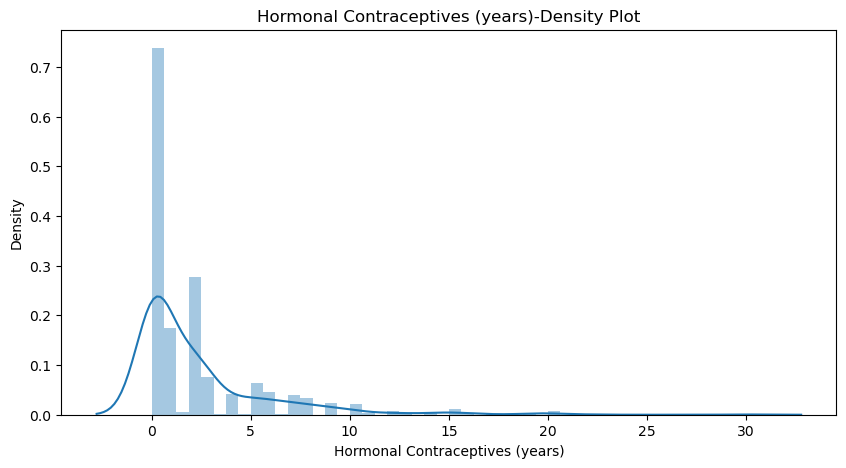

In [30]:
plt.figure(figsize=(10,5))
sns.distplot(df["Hormonal Contraceptives (years)"]);
plt.title("Hormonal Contraceptives (years)-Density Plot");

# Modeling

In [31]:
total=df["Biopsy"].value_counts()
print(total)

0    781
1     54
Name: Biopsy, dtype: int64


In [32]:
x=df.drop(["Biopsy"],axis=1)
y=df["Biopsy"]

In [33]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [34]:
print(y_resampled)

0       0
1       0
2       0
3       0
4       0
       ..
1557    1
1558    1
1559    1
1560    1
1561    1
Name: Biopsy, Length: 1562, dtype: int64


In [35]:
total = pd.Series(y_resampled).value_counts()
print(total)

0    781
1    781
Name: Biopsy, dtype: int64


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=37)
print(x_test.shape)
print(x_train.shape)

(313, 33)
(1249, 33)


In [38]:
x_train.shape

(1249, 33)

In [39]:
y_train.shape

(1249,)

In [40]:
x_test.shape

(313, 33)

In [41]:
y_test.shape

(313,)

# Model_1- SVM

In [42]:
model_svm=LinearSVC(max_iter=1000)
model_svm=CalibratedClassifierCV(model_svm)
clf=model_svm.fit(x_train, y_train)

C:\Users\ragha\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ragha\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ragha\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ragha\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ragha\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [43]:
Y_predict=clf.predict(x_test)
print([Y_predict])

[array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1

In [44]:
print("SVM model Accuracy: {}%" .format(round(accuracy_score(y_test, Y_predict)*100,2)))

SVM model Accuracy: 88.82%


In [45]:
confusion_matrix(y_test, Y_predict)

array([[144,   9],
       [ 26, 134]], dtype=int64)

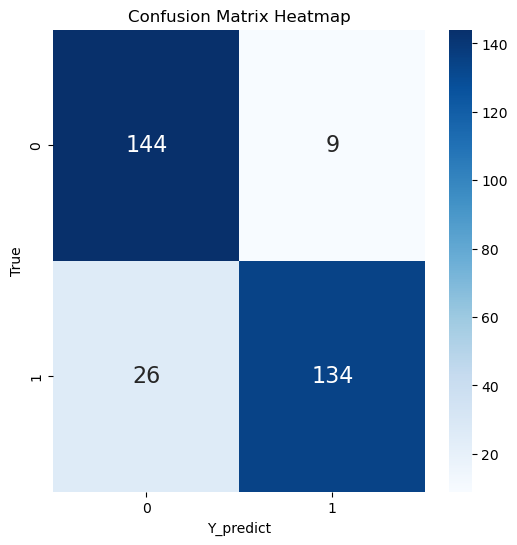

In [46]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, Y_predict), annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})
plt.xlabel('Y_predict')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [47]:
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       153
           1       0.94      0.84      0.88       160

    accuracy                           0.89       313
   macro avg       0.89      0.89      0.89       313
weighted avg       0.89      0.89      0.89       313



# Model_2- KNN

In [48]:
model_knn=KNeighborsClassifier()
knnn=model_knn.fit(x_train, y_train)
Y_predict2=model_knn.predict(x_test)

In [50]:
print("KNN model Accuracy: {}%" .format(round(accuracy_score(y_test, Y_predict2)*100,2)))

KNN model Accuracy: 91.05%


In [51]:
confusion_matrix(y_test, Y_predict2)

array([[127,  26],
       [  2, 158]], dtype=int64)

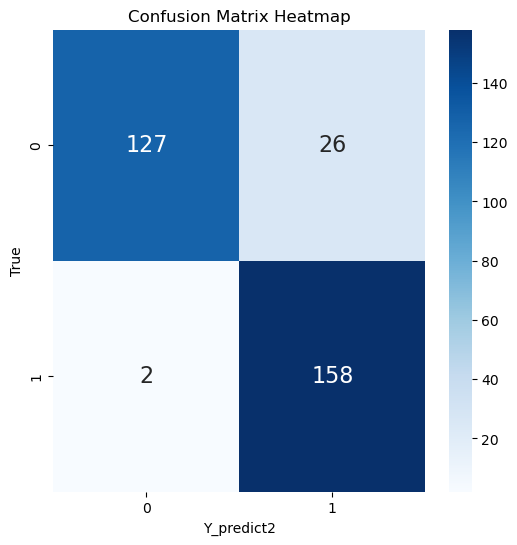

In [52]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, Y_predict2), annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})
plt.xlabel('Y_predict2')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [53]:
print(classification_report(y_test, Y_predict2))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90       153
           1       0.86      0.99      0.92       160

    accuracy                           0.91       313
   macro avg       0.92      0.91      0.91       313
weighted avg       0.92      0.91      0.91       313



# Model_3- Decision tree


In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [55]:
model_dt=DecisionTreeClassifier(random_state=100)
model_dt.fit(x_train, y_train)
Y_predict3=model_dt.predict(x_test)

In [57]:
print("Decision tree model Accuracy: {}%" .format(round(accuracy_score(y_test, Y_predict3)*100,2)))

Decision tree model Accuracy: 97.44%


In [58]:
confusion_matrix(y_test, Y_predict3)

array([[145,   8],
       [  0, 160]], dtype=int64)

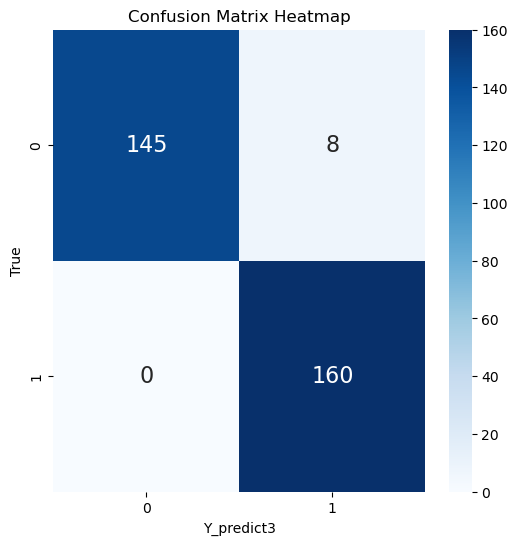

In [59]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, Y_predict3), annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})
plt.xlabel('Y_predict3')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [60]:
print(classification_report(y_test, Y_predict3))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       153
           1       0.95      1.00      0.98       160

    accuracy                           0.97       313
   macro avg       0.98      0.97      0.97       313
weighted avg       0.98      0.97      0.97       313



# Comparison

In [61]:
svm1=round(accuracy_score(y_test, Y_predict)*100, 2)
knn1=round(accuracy_score(y_test, Y_predict2)*100, 2)
dt1=round(accuracy_score(y_test, Y_predict3)*100, 2)

In [62]:
mlist1=[svm1]
mlist2=[knn1]
mlist3=[dt1]


In [63]:
c_df1 = pd.DataFrame(mlist1, columns=["SVM"]).astype(str) + '%'
c_df2 = pd.DataFrame(mlist2, columns=["KNN"]).astype(str) + '%'
c_df3 = pd.DataFrame(mlist3, columns=["DT"]).astype(str) + '%'


In [64]:
f_list=[c_df1,c_df2,c_df3]

In [65]:
svm_knn_dt=pd.concat(f_list, axis=1)

In [66]:
svm_knn_dt=svm_knn_dt.rename(index={0:"Accuracy"})

In [67]:
svm_knn_dt

,SVM,KNN,DT
Accuracy,88.82%,91.05%,97.44%
